In [145]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [146]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [147]:
train_a = pd.read_parquet('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/A/train_targets.parquet')
train_b = pd.read_parquet('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/B/train_targets.parquet')
train_c = pd.read_parquet('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/C/train_targets.parquet')

In [148]:
X_train_estimated_a = pd.read_parquet('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/C/X_train_estimated.parquet')


In [149]:
X_train_observed_a = pd.read_parquet('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/C/X_train_observed.parquet')


In [150]:
X_test_estimated_a = pd.read_parquet('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/C/X_test_estimated.parquet')


<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

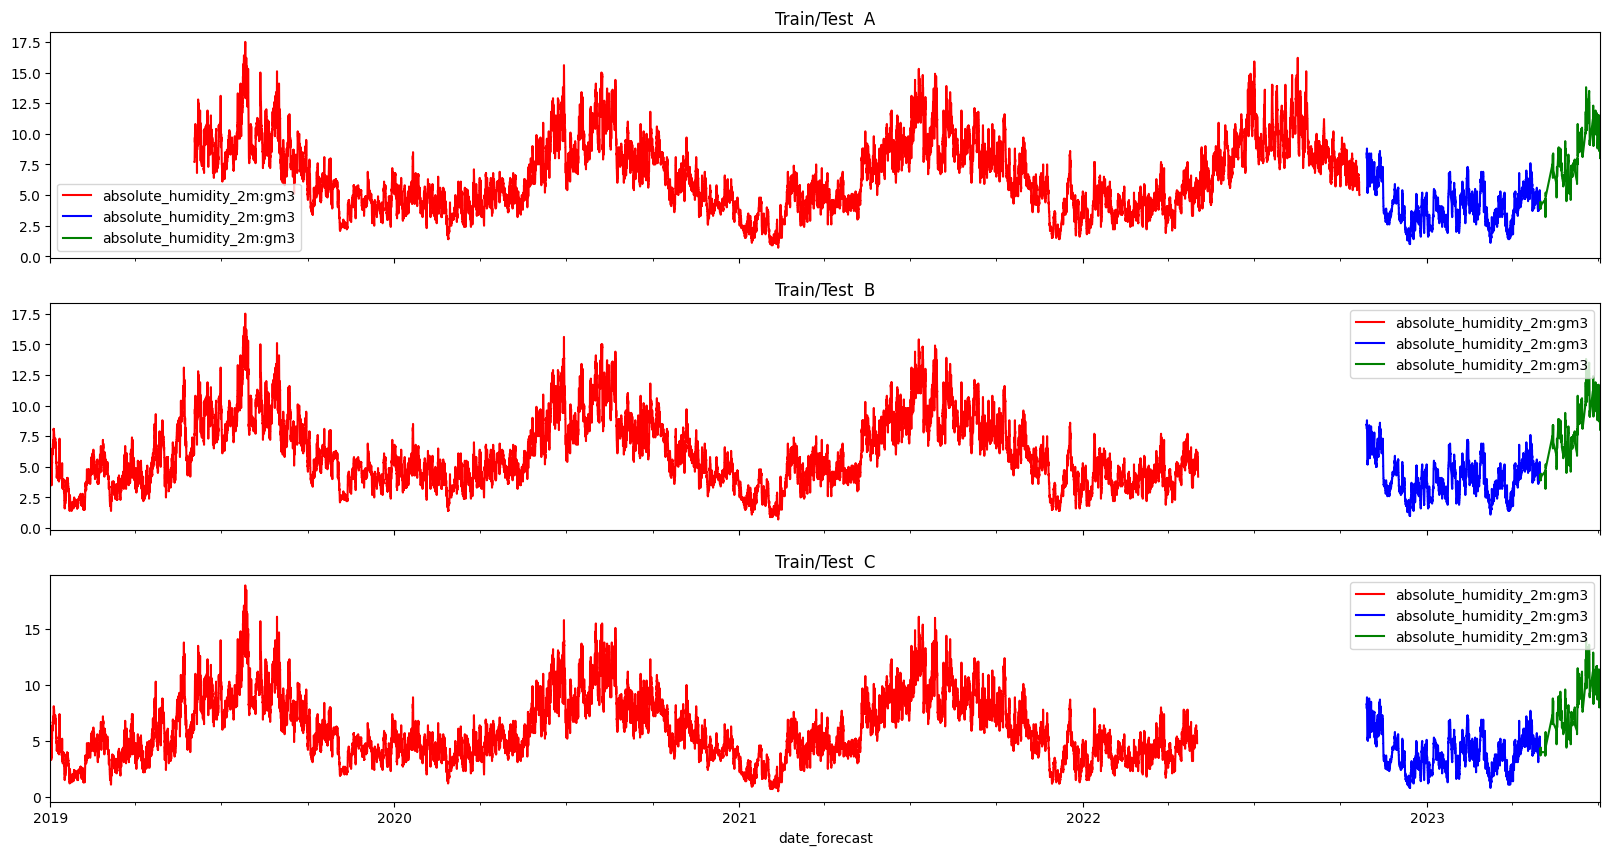

In [7]:
# Plotting a single feature
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'absolute_humidity_2m:gm3'
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')

In [151]:
test = pd.read_csv('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/test.csv')
test

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0,A
1,1,2023-05-01 01:00:00,0,A
2,2,2023-05-01 02:00:00,0,A
3,3,2023-05-01 03:00:00,0,A
4,4,2023-05-01 04:00:00,0,A
...,...,...,...,...
2155,2155,2023-07-03 19:00:00,0,C
2156,2156,2023-07-03 20:00:00,0,C
2157,2157,2023-07-03 21:00:00,0,C
2158,2158,2023-07-03 22:00:00,0,C


In [9]:
sample_submission = pd.read_csv('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/sample_submission.csv')
sample_submission

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2155,2155,0
2156,2156,0
2157,2157,0
2158,2158,0


In [10]:
# Example, let the predictions be random values
test['prediction'] = np.random.rand(len(test))
sample_submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)

# A faire

## Partie I :
- Comparer les lignes
- Voir le lignes vides
- Grouper les varaibles et les comprendre !!!

## Partie II :
- Regarder les liens entre les variables (matrice de covariance)
- Etude des variables quantitatives
- Etude des variables qualitatives

## Partie III :
- Voir si besoin de transformer des varaibles (nom ou autre)
- Se renseigner sur les modèles liées aux times series



# Etude préliminaire

In [ ]:
# Décrire le type de données de chaque colonne
X_train_observed_a.dtypes

date_forecast                     datetime64[ns]
absolute_humidity_2m:gm3                 float32
air_density_2m:kgm3                      float32
ceiling_height_agl:m                     float32
clear_sky_energy_1h:J                    float32
clear_sky_rad:W                          float32
cloud_base_agl:m                         float32
dew_or_rime:idx                          float32
dew_point_2m:K                           float32
diffuse_rad:W                            float32
diffuse_rad_1h:J                         float32
direct_rad:W                             float32
direct_rad_1h:J                          float32
effective_cloud_cover:p                  float32
elevation:m                              float32
fresh_snow_12h:cm                        float32
fresh_snow_1h:cm                         float32
fresh_snow_24h:cm                        float32
fresh_snow_3h:cm                         float32
fresh_snow_6h:cm                         float32
is_day:idx          

In [ ]:
# Compare la variable date_forecast pour les différents fichers de X_train (en prenant début et fin):
print(X_train_observed_a['date_forecast'].min(), X_train_observed_a['date_forecast'].max())
print(X_train_estimated_a['date_forecast'].min(), X_train_estimated_a['date_forecast'].max())
print(X_train_observed_b['date_forecast'].min(), X_train_observed_b['date_forecast'].max())
print(X_train_estimated_b['date_forecast'].min(), X_train_estimated_b['date_forecast'].max())
print(X_train_observed_c['date_forecast'].min(), X_train_observed_c['date_forecast'].max())
print(X_train_estimated_c['date_forecast'].min(), X_train_estimated_c['date_forecast'].max())


2019-06-02 22:00:00 2022-10-21 01:00:00
2022-10-28 22:00:00 2023-04-30 23:45:00
2019-01-01 00:00:00 2022-05-03 00:00:00
2022-10-28 22:00:00 2023-04-30 23:45:00
2019-01-01 00:00:00 2022-05-01 22:00:00
2022-10-28 22:00:00 2023-04-30 23:45:00


In [ ]:
# Affiche la courbe de variation de absolute_humidity_2m:gm3 pour les différents fichiers de X_train
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'absolute_humidity_2m:gm3'
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')


In [ ]:
# Décrire les données
X_train_observed_a.describe()

In [ ]:
# Trace air_density_2m:kgm3 des données X_train_observed_a et X_train_observed_b sur le même graphique
fig, axs = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
feature_name = 'absolute_humidity_2m:gm3'
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs, title='Train/Test A', color='red')
X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs, title='Train/Test  B', color='blue')
X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs, title='Train/Test  C', color='green')

In [ ]:
# Affiche la courbe de variation de air_density_2m:kgm3 pour les différents fichiers de X_train
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'air_density_2m:kgm3'
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')


In [ ]:
# Trace air_density_2m:kgm3 des données X_train_observed_a et X_train_observed_b sur le même graphique
fig, axs = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
feature_name = 'air_density_2m:kgm3'
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs, title='Train/Test A', color='red')
X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs, title='Train/Test  B', color='blue')
X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs, title='Train/Test  C', color='green')

In [ ]:
# Compte le nombre de Nan dans chauqe colonne
X_train_observed_a.isna().sum().sort_values(ascending=False)/(len(X_train_observed_a))

In [ ]:
X_train_estimated_a.isna().sum().sort_values(ascending=False)/(len(X_train_observed_a))

In [ ]:
X_train_observed_b.isna().sum().sort_values(ascending=False)/(len(X_train_observed_a))

In [ ]:
def supperposition(feature_name):
    fig, axs = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
    X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs, title='Train/Test A', color='red')
    X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs, title='Train/Test  B', color='blue')
    X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs, title='Train/Test  C', color='green')

In [ ]:
def globale(feature_name):
    fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
    X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
    X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
    X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
    X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
    X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
    X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')


In [ ]:
supperposition('air_density_2m:kgm3')

In [ ]:
supperposition('clear_sky_energy_1h:J')

In [ ]:
print(train_a.shape[0]*4)
print(X_train_observed_a.shape[0]+X_train_estimated_a.shape[0])

In [ ]:
# Fait une petite étude du fichier train_a
train_a.describe()

In [ ]:
# Affiche la courbe de train_a, train_b et train_c avec en abscisse time et en ordonnée la valeur de la variable
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'pv_measurement'
train_a[['time', feature_name]].set_index('time').plot(ax=axs[0], title='Train A', color='red')
train_b[['time', feature_name]].set_index('time').plot(ax=axs[1], title='Train B', color='blue')
train_c[['time', feature_name]].set_index('time').plot(ax=axs[2], title='Train C', color='green')


In [ ]:
supperposition('clear_sky_rad:W')

In [ ]:
supperposition('cloud_base_agl:m')

In [ ]:
globale('cloud_base_agl:m')

In [ ]:
supperposition('dew_or_rime:idx')

In [ ]:
supperposition('dew_point_2m:K')

In [ ]:
# Compte le nombre de valeur différente de 0 de dew_or_rime:idx pour chaque fichier
print("dew_or_rime:idx non nul A", (X_train_observed_a['dew_or_rime:idx'] != 0).sum())
print("dew_or_rime:idx non nul B", (X_train_observed_b['dew_or_rime:idx'] != 0).sum())
print("dew_or_rime:idx non nul C", (X_train_observed_c['dew_or_rime:idx'] != 0).sum())


In [ ]:
supperposition('diffuse_rad:W')

# Mise en forme

In [152]:
# Copier les dataframe X_train_observed_a, X_train_observed_b et X_train_observed_c
X_train_observed_a_copy = X_train_observed_a.copy()
X_train_observed_b_copy = X_train_observed_b.copy()
X_train_observed_c_copy = X_train_observed_c.copy()

In [153]:
# mettre date_forecast comme index
X_train_observed_a_copy.set_index('date_forecast', inplace=True)
X_train_observed_b_copy.set_index('date_forecast', inplace=True)
X_train_observed_c_copy.set_index('date_forecast', inplace=True)

In [154]:
# modifier les colonnes de X_train_observed_a_copy, X_train_observed_b_copy et X_train_observed_c_copy en ajoutant _a, _b et _c
X_train_observed_a_copy.columns = [col+'_a' for col in X_train_observed_a_copy.columns]
X_train_observed_b_copy.columns = [col+'_b' for col in X_train_observed_b_copy.columns]
X_train_observed_c_copy.columns = [col+'_c' for col in X_train_observed_c_copy.columns]

In [155]:
# Merge les dataframe X_train_observed_a_copy, X_train_observed_b_copy et X_train_observed_c_copy pour le même date_forecast
X_train_observed_merged = pd.merge(X_train_observed_a_copy, X_train_observed_b_copy, left_index=True, right_index=True)
X_train_observed_merged = pd.merge(X_train_observed_merged, X_train_observed_c_copy, left_index=True, right_index=True)

In [156]:
# Décrire X_train_observed_merged
X_train_observed_merged.describe()

,absolute_humidity_2m:gm3_a,air_density_2m:kgm3_a,ceiling_height_agl:m_a,clear_sky_energy_1h:J_a,clear_sky_rad:W_a,cloud_base_agl:m_a,dew_or_rime:idx_a,dew_point_2m:K_a,diffuse_rad:W_a,diffuse_rad_1h:J_a,direct_rad:W_a,direct_rad_1h:J_a,effective_cloud_cover:p_a,elevation:m_a,fresh_snow_12h:cm_a,fresh_snow_1h:cm_a,fresh_snow_24h:cm_a,fresh_snow_3h:cm_a,fresh_snow_6h:cm_a,is_day:idx_a,is_in_shadow:idx_a,msl_pressure:hPa_a,precip_5min:mm_a,precip_type_5min:idx_a,pressure_100m:hPa_a,pressure_50m:hPa_a,prob_rime:p_a,rain_water:kgm2_a,relative_humidity_1000hPa:p_a,sfc_pressure:hPa_a,snow_density:kgm3_a,snow_depth:cm_a,snow_drift:idx_a,snow_melt_10min:mm_a,snow_water:kgm2_a,sun_azimuth:d_a,sun_elevation:d_a,super_cooled_liquid_water:kgm2_a,t_1000hPa:K_a,total_cloud_cover:p_a,visibility:m_a,wind_speed_10m:ms_a,wind_speed_u_10m:ms_a,wind_speed_v_10m:ms_a,wind_speed_w_1000hPa:ms_a,absolute_humidity_2m:gm3_b,air_density_2m:kgm3_b,ceiling_height_agl:m_b,clear_sky_energy_1h:J_b,clear_sky_rad:W_b,cloud_base_agl:m_b,dew_or_rime:idx_b,dew_point_2m:K_b,diffuse_rad:W_b,diffuse_rad_1h:J_b,direct_rad:W_b,direct_rad_1h:J_b,effective_cloud_cover:p_b,elevation:m_b,fresh_snow_12h:cm_b,fresh_snow_1h:cm_b,fresh_snow_24h:cm_b,fresh_snow_3h:cm_b,fresh_snow_6h:cm_b,is_day:idx_b,is_in_shadow:idx_b,msl_pressure:hPa_b,precip_5min:mm_b,precip_type_5min:idx_b,pressure_100m:hPa_b,pressure_50m:hPa_b,prob_rime:p_b,rain_water:kgm2_b,relative_humidity_1000hPa:p_b,sfc_pressure:hPa_b,snow_density:kgm3_b,snow_depth:cm_b,snow_drift:idx_b,snow_melt_10min:mm_b,snow_water:kgm2_b,sun_azimuth:d_b,sun_elevation:d_b,super_cooled_liquid_water:kgm2_b,t_1000hPa:K_b,total_cloud_cover:p_b,visibility:m_b,wind_speed_10m:ms_b,wind_speed_u_10m:ms_b,wind_speed_v_10m:ms_b,wind_speed_w_1000hPa:ms_b,absolute_humidity_2m:gm3_c,air_density_2m:kgm3_c,ceiling_height_agl:m_c,clear_sky_energy_1h:J_c,clear_sky_rad:W_c,cloud_base_agl:m_c,dew_or_rime:idx_c,dew_point_2m:K_c,diffuse_rad:W_c,diffuse_rad_1h:J_c,direct_rad:W_c,direct_rad_1h:J_c,effective_cloud_cover:p_c,elevation:m_c,fresh_snow_12h:cm_c,fresh_snow_1h:cm_c,fresh_snow_24h:cm_c,fresh_snow_3h:cm_c,fresh_snow_6h:cm_c,is_day:idx_c,is_in_shadow:idx_c,msl_pressure:hPa_c,precip_5min:mm_c,precip_type_5min:idx_c,pressure_100m:hPa_c,pressure_50m:hPa_c,prob_rime:p_c,rain_water:kgm2_c,relative_humidity_1000hPa:p_c,sfc_pressure:hPa_c,snow_density:kgm3_c,snow_depth:cm_c,snow_drift:idx_c,snow_melt_10min:mm_c,snow_water:kgm2_c,sun_azimuth:d_c,sun_elevation:d_c,super_cooled_liquid_water:kgm2_c,t_1000hPa:K_c,total_cloud_cover:p_c,visibility:m_c,wind_speed_10m:ms_c,wind_speed_u_10m:ms_c,wind_speed_v_10m:ms_c,wind_speed_w_1000hPa:ms_c
count,102145.000000,102145.000000,82859.000000,102145.000,102145.000000,95068.000000,102145.000000,102145.000000,102145.000000,1.021450e+05,102145.000000,1.021450e+05,102145.000000,102145.0,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,2724.0,102145.000000,102145.0,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,84314.000000,1.021450e+05,102145.000000,95590.000000,102145.000000,102145.000000,102145.000000,1.021450e+05,102145.000000,1.021450e+05,102145.000000,102145.0,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,2739.0,102145.000000,102145.0,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,102145.000000,83126.000000,1.021450e+05,102145.000000,94537.000000,102145.000000,102145.000000,102145.000000,1.02

# Deuxième étude préli

In [ ]:
# Matrice de corrélation en couleurs de X_train_observed sans afficher les valeurs
import seaborn as sns

corr = X_train_observed_merged.corr()
plt.figure(figsize=(40, 40))
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)

KeyboardInterrupt: ignored

In [ ]:
# Matrice de corrélation en couleurs
import seaborn as sns

corr = X_train_observed_a.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)

In [ ]:
# Décrire le nombre de ligne des train et test
print('X_train_estimated_a', X_train_estimated_a.shape)
print('X_train_estimated_b', X_train_estimated_b.shape)
print('X_train_estimated_c', X_train_estimated_c.shape)
print('X_train_observed_a', X_train_observed_a.shape)
print('X_train_observed_b', X_train_observed_b.shape)
print('X_train_observed_c', X_train_observed_c.shape)
print('X_test_estimated_a', X_test_estimated_a.shape)
print('X_test_estimated_b', X_test_estimated_b.shape)
print('X_test_estimated_c', X_test_estimated_c.shape)


In [ ]:
# Affiche les colonnes de observation et estimated
print('X_train_observed_a', X_train_observed_a.columns)
print('X_train_estimated_a', X_train_estimated_a.columns)

In [ ]:
# Récupère mes données de X_train_estimated_a tel que la colonne date_forecast la même que dans X_train_observed_a
X_diff_a = X_train_estimated_a[X_train_estimated_a['date_forecast'].isin(X_train_observed_a['date_forecast'])]

# Affiche les résultats
print('X_diff_a', X_diff_a.shape)

# Affiche

In [ ]:
# Afficher le début de la colonne date_forecast de X_train_estimated_a
print('X_train_estimated_a', X_train_estimated_a['date_forecast'].head())
print('X_train_estimated_a', X_train_estimated_a['date_forecast'].tail())

#Afficher la fin de la colonne date_forecast de X_train_observed_a
print('X_train_observed_a', X_train_observed_a['date_forecast'].head())
print('X_train_observed_a', X_train_observed_a['date_forecast'].tail())

print('X_test_estimated_a', X_test_estimated_a['date_forecast'].head())
print('X_test_estimated_a', X_test_estimated_a['date_forecast'].tail())

# Création du df avec la colonne locatisation

In [157]:
[X_train_estimated_a, X_train_estimated_b, X_train_estimated_c]
keys = [1, 2, 3]

In [158]:
frames_train_estimated = [X_train_estimated_a, X_train_estimated_b, X_train_estimated_c]
X_train_estimated = pd.concat(frames_train_estimated, keys=keys)
X_train_estimated.reset_index(level=0, inplace=True, names='location')

frames_train_observed = [X_train_observed_a, X_train_observed_b, X_train_observed_c]
X_train_observed = pd.concat(frames_train_observed, keys=keys)
X_train_observed.reset_index(level=0, inplace=True, names='location')

frames_test_estimated = [X_test_estimated_a, X_test_estimated_b, X_test_estimated_c]
X_test_estimated = pd.concat(frames_test_estimated, keys=keys)
X_test_estimated.reset_index(level=0, inplace=True, names='location')

In [159]:
X_train_estimated_merged = pd.concat(frames_train_estimated, axis=1)
X_train_estimated_merged.reset_index(drop=True, inplace=True)

X_train_observed_merged = pd.concat(frames_train_observed, axis=1)
X_train_observed_merged.reset_index(drop=True, inplace=True)

X_test_estimated_merged = pd.concat(frames_test_estimated, axis=1)
X_test_estimated_merged.reset_index(drop=True, inplace=True)

In [160]:
frames = [[X_train_estimated_a, train_a], [X_train_observed_a, train_a.dropna()]]
X_train_observed_merged_result = pd.concat(frames[1], axis=0)
X_train_observed_merged_result.reset_index(drop=True, inplace=True)

In [161]:
frames_train_estimated = [X_train_estimated_a.drop(columns=["date_calc"]), X_train_observed_a, X_test_estimated_a.drop(columns=["date_calc"])]
X_frames_a = pd.concat(frames_train_estimated, keys=keys)
X_frames_a.reset_index(level=0, inplace=True, names='frame_type')

train_a = train_a.rename(columns={'time': 'date_forecast'})
X_y_a = X_frames_a.merge(train_a, on='date_forecast', how='inner')
X_y_a.reset_index(drop=True, inplace=True)

In [162]:
frames_train_estimated = [X_train_estimated_b.drop(columns=["date_calc"]), X_train_observed_b, X_test_estimated_b.drop(columns=["date_calc"])]
X_frames_b = pd.concat(frames_train_estimated, keys=keys)
X_frames_b.reset_index(level=0, inplace=True, names='frame_type')

train_b = train_b.rename(columns={'time': 'date_forecast'})
X_y_b = X_frames_b.merge(train_b.dropna(), on='date_forecast', how='inner')
X_y_b.reset_index(drop=True, inplace=True)

frames_train_estimated = [X_train_estimated_c.drop(columns=["date_calc"]), X_train_observed_c, X_test_estimated_c.drop(columns=["date_calc"])]
X_frames_c = pd.concat(frames_train_estimated, keys=keys)
X_frames_c.reset_index(level=0, inplace=True, names='frame_type')

train_c = train_c.rename(columns={'time': 'date_forecast'})
X_y_c = X_frames_c.merge(train_c.dropna(), on='date_forecast', how='inner')
X_y_c.reset_index(drop=True, inplace=True)

frames_location= [X_y_a, X_y_b, X_y_c]
X_y = pd.concat(frames_location, keys=keys)
X_y.reset_index(level=0, inplace=True, names='location')
X_y

,location,frame_type,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement
0,1,1,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.000000,0.000000,1211.699951,1.0,281.399994,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.00,0.0,988.500000,994.500000,0.0,0.0,92.699997,1000.599976,NaN,0.0,0.0,-0.0,0.4,340.799011,-38.466999,0.0,284.700012,100.000000,29429.699219,0.8,-0.4,0.7,-0.0,0.0
1,1,1,2022-10-28 23:00:00,8.2,1.233,4068.199951,0.000000,0.000000,2607.000000,1.0,281.100006,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.799988,0.00,0.0,987.299988,993.299988,0.0,0.1,92.599998,999.299988,NaN,0.0,0.0,-0.0,0.6,359.638000,-39.609001,0.0,284.600006,100.000000,6254.399902,0.6,-0.1,0.6,-0.0,0.0
2,1,1,2022-10-29 00:00:00,8.2,1.230,1978.000000,0.000000,0.000000,1660.500000,1.0,281.000000,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,997.200012,0.08,1.0,984.700012,990.700012,0.0,0.2,89.199997,996.700012,NaN,0.0,0.0,-0.0,1.4,17.361000,-39.013000,0.1,283.700012,100.000000,3041.600098,1.5,1.2,0.8,-0.0,0.0
3,1,1,2022-10-29 01:00:00,8.1,1.229,1722.000000,0.000000,0.000000,1699.300049,1.0,280.899994,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,996.500000,0.13,1.0,984.000000,990.000000,0.0,0.2,89.199997,996.000000,NaN,0.0,0.0,-0.0,0.8,35.452000,-36.023998,0.3,284.200012,100.000000,3572.600098,1.5,0.8,1.2,-0.0,0.0
4,1,1,2022-10-29 02:00:00,8.3,1.228,1456.400024,0.000000,0.000000,1294.699951,1.0,281.299988,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,996.099976,0.09,1.0,983.599976,989.500000,0.0,0.3,91.800003,995.599976,NaN,0.0,0.0,-0.0,0.9,52.154999,-31.374001,0.2,284.600006,100.000000,2699.199951,1.8,1.3,1.2,-0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26066,3,2,2022-04-25 17:00:00,4.8,1.263,834.400024,889105.875000,181.300003,625.200012,0.0,273.399994,77.099998,371056.187500,22.1,151282.593750,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1019.299988,0.00,0.0,1003.500000,1009.599976,0.0,0.0,68.000000,1015.799988,NaN,0.0,0.0,-0.0,0.0,272.343994,13.531000,0.1,277.600006,100.000000,38154.898438,4.2,3.0,-2.9,0.0,98.0
26067,3,2,2022-04-25 18:00:00,4.8,1.265,1177.599976,436398.906250,66.800003,699.000000,0.0,273.299988,34.099998,200220.500000,6.4,51269.500000,85.699997,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1019.299988,0.01,1.0,1003.500000,1009.700012,0.0,0.0,66.599998,1015.900024,NaN,0.0,0.0,-0.0,0.0,285.618988,6.894000,0.0,277.600006,85.699997,35621.601562,3.6,2.5,-2.6,0.0,39.2
26068,3,2,2022-04-25 19:00:00,4.8,1.266,NaN,111474.203125,4.800000,715.299988,0.0,273.299988,4.600000,69705.898438,0.0,11484.099609,48.799999,24.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1019.500000,0.00,0.0,1003.700012,1009.900024,0.0,0.0,67.099998,1016.099976,NaN,0.0,0.0,-0.0,0.0,298.915009,0.674000,0.0,277.600006,48.799999,37843.800781,3.1,2.4,-1.9,0.0,0.0
26069,3,2,2022-04-25 20:00:00,5.0,1.274,NaN,1336.400024,0.000000,548.900024,0.0,273.899994,0.000000,8255.700195,0.0,0.000000,55.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1019.79

In [77]:
X_y.dtypes

location                                   int64
frame_type                                 int64
date_forecast                     datetime64[ns]
absolute_humidity_2m:gm3                 float32
air_density_2m:kgm3                      float32
ceiling_height_agl:m                     float32
clear_sky_energy_1h:J                    float32
clear_sky_rad:W                          float32
cloud_base_agl:m                         float32
dew_or_rime:idx                          float32
dew_point_2m:K                           float32
diffuse_rad:W                            float32
diffuse_rad_1h:J                         float32
direct_rad:W                             float32
direct_rad_1h:J                          float32
effective_cloud_cover:p                  float32
elevation:m                              float32
fresh_snow_12h:cm                        float32
fresh_snow_1h:cm                         float32
fresh_snow_24h:cm                        float32
fresh_snow_3h:cm    

In [163]:
# Séparation X et y

y = X_y["pv_measurement"]
X = X_y.drop("pv_measurement",axis=1)

In [23]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
26066    98.0
26067    39.2
26068     0.0
26069     0.0
26070     0.0
Name: pv_measurement, Length: 92951, dtype: float64

In [24]:
X

,location,frame_type,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,1,1,2022-10-28 22:00:00,8.4,1.233,1425.099976,0.000000,0.000000,1211.699951,1.0,281.399994,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.00,0.0,988.500000,994.500000,0.0,0.0,92.699997,1000.599976,NaN,0.0,0.0,-0.0,0.4,340.799011,-38.466999,0.0,284.700012,100.000000,29429.699219,0.8,-0.4,0.7,-0.0
1,1,1,2022-10-28 23:00:00,8.2,1.233,4068.199951,0.000000,0.000000,2607.000000,1.0,281.100006,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.799988,0.00,0.0,987.299988,993.299988,0.0,0.1,92.599998,999.299988,NaN,0.0,0.0,-0.0,0.6,359.638000,-39.609001,0.0,284.600006,100.000000,6254.399902,0.6,-0.1,0.6,-0.0
2,1,1,2022-10-29 00:00:00,8.2,1.230,1978.000000,0.000000,0.000000,1660.500000,1.0,281.000000,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,997.200012,0.08,1.0,984.700012,990.700012,0.0,0.2,89.199997,996.700012,NaN,0.0,0.0,-0.0,1.4,17.361000,-39.013000,0.1,283.700012,100.000000,3041.600098,1.5,1.2,0.8,-0.0
3,1,1,2022-10-29 01:00:00,8.1,1.229,1722.000000,0.000000,0.000000,1699.300049,1.0,280.899994,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,996.500000,0.13,1.0,984.000000,990.000000,0.0,0.2,89.199997,996.000000,NaN,0.0,0.0,-0.0,0.8,35.452000,-36.023998,0.3,284.200012,100.000000,3572.600098,1.5,0.8,1.2,-0.0
4,1,1,2022-10-29 02:00:00,8.3,1.228,1456.400024,0.000000,0.000000,1294.699951,1.0,281.299988,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,996.099976,0.09,1.0,983.599976,989.500000,0.0,0.3,91.800003,995.599976,NaN,0.0,0.0,-0.0,0.9,52.154999,-31.374001,0.2,284.600006,100.000000,2699.199951,1.8,1.3,1.2,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26066,3,2,2022-04-25 17:00:00,4.8,1.263,834.400024,889105.875000,181.300003,625.200012,0.0,273.399994,77.099998,371056.187500,22.1,151282.593750,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1019.299988,0.00,0.0,1003.500000,1009.599976,0.0,0.0,68.000000,1015.799988,NaN,0.0,0.0,-0.0,0.0,272.343994,13.531000,0.1,277.600006,100.000000,38154.898438,4.2,3.0,-2.9,0.0
26067,3,2,2022-04-25 18:00:00,4.8,1.265,1177.599976,436398.906250,66.800003,699.000000,0.0,273.299988,34.099998,200220.500000,6.4,51269.500000,85.699997,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1019.299988,0.01,1.0,1003.500000,1009.700012,0.0,0.0,66.599998,1015.900024,NaN,0.0,0.0,-0.0,0.0,285.618988,6.894000,0.0,277.600006,85.699997,35621.601562,3.6,2.5,-2.6,0.0
26068,3,2,2022-04-25 19:00:00,4.8,1.266,NaN,111474.203125,4.800000,715.299988,0.0,273.299988,4.600000,69705.898438,0.0,11484.099609,48.799999,24.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1019.500000,0.00,0.0,1003.700012,1009.900024,0.0,0.0,67.099998,1016.099976,NaN,0.0,0.0,-0.0,0.0,298.915009,0.674000,0.0,277.600006,48.799999,37843.800781,3.1,2.4,-1.9,0.0
26069,3,2,2022-04-25 20:00:00,5.0,1.274,NaN,1336.400024,0.000000,548.900024,0.0,273.899994,0.000000,8255.700195,0.0,0.000000,55.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1019.799988,0.00,0.0,1004.099976,1010.299988,0.0,0.0,75.1999

## Réalisation d'un RandomForest pour classer les variables

In [164]:
from sklearn.preprocessing import StandardScaler

### Gestion des Nan

In [165]:
X_copy = X.copy()

In [166]:
X_copy_nan = X_copy.dropna(axis=1, how='any')

In [167]:
X_copy_nan.reset_index(drop=True, inplace=True)

In [168]:
X_copy_nan

,location,frame_type,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,1,1,2022-10-28 22:00:00,8.4,1.233,0.000000,0.000000,1.0,281.399994,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.00,0.0,988.500000,994.500000,0.0,0.0,92.699997,1000.599976,0.0,0.0,-0.0,0.4,340.799011,-38.466999,0.0,284.700012,100.000000,29429.699219,0.8,-0.4,0.7,-0.0
1,1,1,2022-10-28 23:00:00,8.2,1.233,0.000000,0.000000,1.0,281.100006,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.799988,0.00,0.0,987.299988,993.299988,0.0,0.1,92.599998,999.299988,0.0,0.0,-0.0,0.6,359.638000,-39.609001,0.0,284.600006,100.000000,6254.399902,0.6,-0.1,0.6,-0.0
2,1,1,2022-10-29 00:00:00,8.2,1.230,0.000000,0.000000,1.0,281.000000,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,997.200012,0.08,1.0,984.700012,990.700012,0.0,0.2,89.199997,996.700012,0.0,0.0,-0.0,1.4,17.361000,-39.013000,0.1,283.700012,100.000000,3041.600098,1.5,1.2,0.8,-0.0
3,1,1,2022-10-29 01:00:00,8.1,1.229,0.000000,0.000000,1.0,280.899994,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,996.500000,0.13,1.0,984.000000,990.000000,0.0,0.2,89.199997,996.000000,0.0,0.0,-0.0,0.8,35.452000,-36.023998,0.3,284.200012,100.000000,3572.600098,1.5,0.8,1.2,-0.0
4,1,1,2022-10-29 02:00:00,8.3,1.228,0.000000,0.000000,1.0,281.299988,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,996.099976,0.09,1.0,983.599976,989.500000,0.0,0.3,91.800003,995.599976,0.0,0.0,-0.0,0.9,52.154999,-31.374001,0.2,284.600006,100.000000,2699.199951,1.8,1.3,1.2,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92946,3,2,2022-04-25 17:00:00,4.8,1.263,889105.875000,181.300003,0.0,273.399994,77.099998,371056.187500,22.1,151282.593750,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1019.299988,0.00,0.0,1003.500000,1009.599976,0.0,0.0,68.000000,1015.799988,0.0,0.0,-0.0,0.0,272.343994,13.531000,0.1,277.600006,100.000000,38154.898438,4.2,3.0,-2.9,0.0
92947,3,2,2022-04-25 18:00:00,4.8,1.265,436398.906250,66.800003,0.0,273.299988,34.099998,200220.500000,6.4,51269.500000,85.699997,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1019.299988,0.01,1.0,1003.500000,1009.700012,0.0,0.0,66.599998,1015.900024,0.0,0.0,-0.0,0.0,285.618988,6.894000,0.0,277.600006,85.699997,35621.601562,3.6,2.5,-2.6,0.0
92948,3,2,2022-04-25 19:00:00,4.8,1.266,111474.203125,4.800000,0.0,273.299988,4.600000,69705.898438,0.0,11484.099609,48.799999,24.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1019.500000,0.00,0.0,1003.700012,1009.900024,0.0,0.0,67.099998,1016.099976,0.0,0.0,-0.0,0.0,298.915009,0.674000,0.0,277.600006,48.799999,37843.800781,3.1,2.4,-1.9,0.0
92949,3,2,2022-04-25 20:00:00,5.0,1.274,1336.400024,0.000000,0.0,273.899994,0.000000,8255.700195,0.0,0.000000,55.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1019.799988,0.00,0.0,1004.099976,1010.299988,0.0,0.0,75.199997,1016.500000,0.0,0.0,-0.0,0.0,312.519989,-4.783000,0.0,277.000000,55.599998,32277.000000,3.1,2.3,-2.0,0.0


In [169]:
X_copy_nan[('date_forecast')] = X_copy_nan[('date_forecast')].values.astype("float64")

<ipython-input-169-bed2e84b5fdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_copy_nan[('date_forecast')] = X_copy_nan[('date_forecast')].values.astype("float64")


In [170]:
X_copy_nan

,location,frame_type,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,1,1,1.666994e+18,8.4,1.233,0.000000,0.000000,1.0,281.399994,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1001.099976,0.00,0.0,988.500000,994.500000,0.0,0.0,92.699997,1000.599976,0.0,0.0,-0.0,0.4,340.799011,-38.466999,0.0,284.700012,100.000000,29429.699219,0.8,-0.4,0.7,-0.0
1,1,1,1.666998e+18,8.2,1.233,0.000000,0.000000,1.0,281.100006,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,999.799988,0.00,0.0,987.299988,993.299988,0.0,0.1,92.599998,999.299988,0.0,0.0,-0.0,0.6,359.638000,-39.609001,0.0,284.600006,100.000000,6254.399902,0.6,-0.1,0.6,-0.0
2,1,1,1.667002e+18,8.2,1.230,0.000000,0.000000,1.0,281.000000,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,997.200012,0.08,1.0,984.700012,990.700012,0.0,0.2,89.199997,996.700012,0.0,0.0,-0.0,1.4,17.361000,-39.013000,0.1,283.700012,100.000000,3041.600098,1.5,1.2,0.8,-0.0
3,1,1,1.667005e+18,8.1,1.229,0.000000,0.000000,1.0,280.899994,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,996.500000,0.13,1.0,984.000000,990.000000,0.0,0.2,89.199997,996.000000,0.0,0.0,-0.0,0.8,35.452000,-36.023998,0.3,284.200012,100.000000,3572.600098,1.5,0.8,1.2,-0.0
4,1,1,1.667009e+18,8.3,1.228,0.000000,0.000000,1.0,281.299988,0.000000,0.000000,0.0,0.000000,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,996.099976,0.09,1.0,983.599976,989.500000,0.0,0.3,91.800003,995.599976,0.0,0.0,-0.0,0.9,52.154999,-31.374001,0.2,284.600006,100.000000,2699.199951,1.8,1.3,1.2,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92946,3,2,1.650906e+18,4.8,1.263,889105.875000,181.300003,0.0,273.399994,77.099998,371056.187500,22.1,151282.593750,100.000000,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1019.299988,0.00,0.0,1003.500000,1009.599976,0.0,0.0,68.000000,1015.799988,0.0,0.0,-0.0,0.0,272.343994,13.531000,0.1,277.600006,100.000000,38154.898438,4.2,3.0,-2.9,0.0
92947,3,2,1.650910e+18,4.8,1.265,436398.906250,66.800003,0.0,273.299988,34.099998,200220.500000,6.4,51269.500000,85.699997,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1019.299988,0.01,1.0,1003.500000,1009.700012,0.0,0.0,66.599998,1015.900024,0.0,0.0,-0.0,0.0,285.618988,6.894000,0.0,277.600006,85.699997,35621.601562,3.6,2.5,-2.6,0.0
92948,3,2,1.650913e+18,4.8,1.266,111474.203125,4.800000,0.0,273.299988,4.600000,69705.898438,0.0,11484.099609,48.799999,24.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1019.500000,0.00,0.0,1003.700012,1009.900024,0.0,0.0,67.099998,1016.099976,0.0,0.0,-0.0,0.0,298.915009,0.674000,0.0,277.600006,48.799999,37843.800781,3.1,2.4,-1.9,0.0
92949,3,2,1.650917e+18,5.0,1.274,1336.400024,0.000000,0.0,273.899994,0.000000,8255.700195,0.0,0.000000,55.599998,24.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1019.799988,0.00,0.0,1004.099976,1010.299988,0.0,0.0,75.199997,1016.500000,0.0,0.0,-0.0,0.0,312.519989,-4.783000,0.0,277.000000,55.599998,32277.000000,3.1,2.3,-2.0,0.0



### Normalisation
---



In [171]:
def sklearn_z_score_normalize_dataframe(df,return_scaler=False,scaler=None):
    """
    Normalizes a DataFrame using z-score normalization (mean and standard deviation) from Scikit-Learn.

    Parameters:
    df (pd.DataFrame): The DataFrame to be normalized.

    Returns:
    pd.DataFrame: The z-score normalized DataFrame.
    """
    if scaler == None :
      # Create a StandardScaler instance
      scaler = StandardScaler()

      # Fit the scaler on the DataFrame and transform the data
      normalized_data = scaler.fit_transform(df)

    else : normalized_data = scaler.transform(df)

    # Create a new DataFrame with the scaled data
    normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

    # retourner le scaler
    if return_scaler :
      return normalized_df,scaler
    return normalized_df

In [172]:
def normalize_dataframe(df):
    """
    Normalizes a DataFrame using the min-max scaling method.

    Parameters:
    df (pd.DataFrame): The DataFrame to be normalized.

    Returns:
    pd.DataFrame: The normalized DataFrame.
    """
    # Copy the input DataFrame to avoid modifying the original
    normalized_df = df.copy()

    # Iterate through each numeric column and apply min-max scaling
    for column in normalized_df.columns:
        if pd.api.types.is_numeric_dtype(normalized_df[column]):
            min_val = normalized_df[column].min()
            max_val = normalized_df[column].max()
            if min_val != max_val:
                normalized_df[column] = (normalized_df[column] - min_val) / (max_val - min_val)

    return normalized_df

In [173]:
X_y_norm = X_copy_nan.copy()
X_y_norm = sklearn_z_score_normalize_dataframe(X_y_norm)


In [174]:
X_y_norm_2 = X_copy_nan.copy()
X_y_norm_max = normalize_dataframe(X_y_norm_2)

In [175]:
X_y_norm_max.describe()

,location,frame_type,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000,92951.000000
mean,0.457020,0.882465,0.502397,0.324565,0.385546,0.171336,0.171317,0.503513,0.600813,0.116130,0.120261,0.073367,0.073895,0.670135,0.300097,0.003106,0.001356,0.006147,0.001408,0.001708,0.483341,0.565384,0.653333,0.004111,0.013876,0.653007,0.652406,0.007786,0.006912,0.672914,0.651443,0.010558,0.000022,0.001526,0.013090,0.506622,0.488217,0.040674,0.474252,0.736043,0.429429,0.199863,0.408337,0.545486,0.499919
std,0.399856,0.322058,0.259637,0.159679,0.121219,0.272899,0.273563,0.123016,0.146981,0.178323,0.182622,0.165053,0.164249,0.350448,0.437624,0.020866,0.015862,0.032574,0.013625,0.014159,0.499725,0.495709,0.131153,0.024283,0.064151,0.128668,0.128487,0.055912,0.030691,0.177994,0.128205,0.068541,0.004639,0.023958,0.036376,0.285880,0.240352,0.079630,0.143620,0.349930,0.239131,0.117007,0.144051,0.103661,0.032512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.288380,0.205882,0.301324,0.000000,0.000000,0.500000,0.503226,0.000000,0.000000,0.000000,0.000000,0.413000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.572145,0.000000,0.000000,0.573689,0.573255,0.000000,0.000000,0.555279,0.572265,0.000000,0.000000,0.000000,0.000000,0.257747,0.315004,0.000000,0.374449,0.517000,0.204528,0.111842,0.302564,0.475410,0.500000
50%,0.500000,1.000000,0.492581,0.288235,0.384106,0.001512,0.000000,0.500000,0.595699,0.000000,0.008417,0.000000,0.000000,0.808000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.661323,0.000000,0.000000,0.662710,0.661750,0.000000,0.000000,0.701863,0.660156,0.000000,0.000000,0.000000,0.000000,0.498676,0.490395,0.000000,0.458150,0.948000,0.485851,0.177632,0.389744,0.546448,0.500000
75%,1.000000,1.000000,0.696782,0.429412,0.463576,0.258838,0.264516,0.500000,0.713979,0.194061,0.200042,0.042379,0.046350,0.993000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.744489,0.000000,0.000000,0.742829,0.742379,0.000000,0.000000,0.814907,0.740234,0.000000,0.000000,0.000000,0.014493,0.754177,0.655845,0.071429,0.572687,1.000000,0.633739,0.269737,0.502564,0.612022,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

In [176]:
X_y_norm.describe()

,location,frame_type,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,92951.000000,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04,9.295100e+04
mean,1.320930e-16,2.788630e-16,3.219156e-15,1.247545e-16,-2.397244e-16,5.993109e-17,-5.259259e-17,-2.935400e-17,-7.558656e-16,8.561585e-18,5.626184e-17,-2.201550e-17,-2.201550e-17,-8.072351e-17,-1.956934e-17,3.180017e-17,2.323859e-17,1.956934e-17,-3.546942e-17,2.201550e-17,1.431008e-16,0.000000,-1.794264e-15,-6.115418e-19,-1.467700e-17,-2.899931e-15,-8.830663e-16,-1.467700e-17,-1.039621e-17,-2.482860e-16,-3.504134e-15,-5.167528e-17,2.025732e-18,-1.100775e-17,4.158484e-17,1.372147e-16,1.712317e-17,-6.115418e-18,3.074832e-15,-9.295435e-17,7.307924e-17,5.381568e-17,2.446167e-17,-2.935400e-17,2.109819e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.142968e+00,-2.740091e+00,-1.935013e+00,-2.032619e+00,-3.180580e+00,-6.278377e-01,-6.262476e-01,-4.093093e+00,-4.087715e+00,-6.512390e-01,-6.585273e-01,-4.445067e-01,-4.499015e-01,-1.912234e+00,-6.857440e-01,-1.488719e-01,-8.550676e-02,-1.887097e-01,-1.033294e-01,-1.206292e-01,-9.672184e-01,-1.140562,-4.981489e+00,-1.693074e-01,-2.163119e-01,-5.075162e+00,-5.077645e+00,-1.392617e-01,-2.252209e-01,-3.780553e+00,-5.081295e+00,-1.540341e-01,-4.638661e-03,-6.371605e-02,-3.598707e-01,-1.772160e+00,-2.031266e+00,-5.107956e-01,-3.302153e+00,-2.103408e+00,-1.795799e+00,-1.708135e+00,-2.834682e+00,-5.262244e+00,-1.537666e+01
25%,-1.142968e+00,3.649513e-01,-8.243004e-01,-7.432620e-01,-6.947873e-01,-6.278377e-01,-6.262476e-01,-2.855422e-02,-6.639454e-01,-6.512390e-01,-6.585273e-01,-4.445067e-01,-4.499015e-01,-7.337365e-01,-6.857440e-01,-1.488719e-01,-8.550676e-02,-1.887097e-01,-1.033294e-01,-1.206292e-01,-9.672184e-01,-1.140562,-6.190364e-01,-1.693074e-01,-2.163119e-01,-6.164585e-01,-6.160317e-01,-1.392617e-01,-2.252209e-01,-6.608911e-01,-6.175928e-01,-1.540341e-01,-4.638661e-03,-6.371605e-02,-3.598707e-01,-8.705634e-01,-7.206651e-01,-5.107956e-01,-6.949143e-01,-6.259638e-01,-9.404954e-01,-7.522714e-01,-7.342755e-01,-6.760202e-01,2.481814e-03
50%,1.074884e-01,3.649513e-01,-3.780817e-02,-2.275192e-01,-1.187757e-02,-6.222987e-01,-6.262476e-01,-2.855422e-02,-3.479314e-02,-6.512390e-01,-6.124346e-01,-4.445067e-01,-4.499015e-01,

## Réalisation du Random Forest

In [177]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [178]:
def build_model(X_train, y_train, X_test, y_test, n_estimators=100, max_depth=10, random_state=42):
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred, y_test

In [179]:
def plot_feature_importances(model, X):
    plt.figure(figsize=(10, 10))
    plt.barh(X.columns, model.feature_importances_)

In [180]:
def analyse_model(y_pred, y_test):
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"RMSE: {rmse}")
    plt.figure(figsize=(10, 10))
    plt.scatter(y_test, y_pred)
    plt.plot([0, 1], [0, 1], color='red')
    plt.xlabel('y_test')
    plt.ylabel('y_pred')

In [ ]:
model, y_pred, y_test = build_model(X_y_norm_max,y,     ,       ,n_estimators=50, max_depth=15)

RMSE: 267.2473747168463


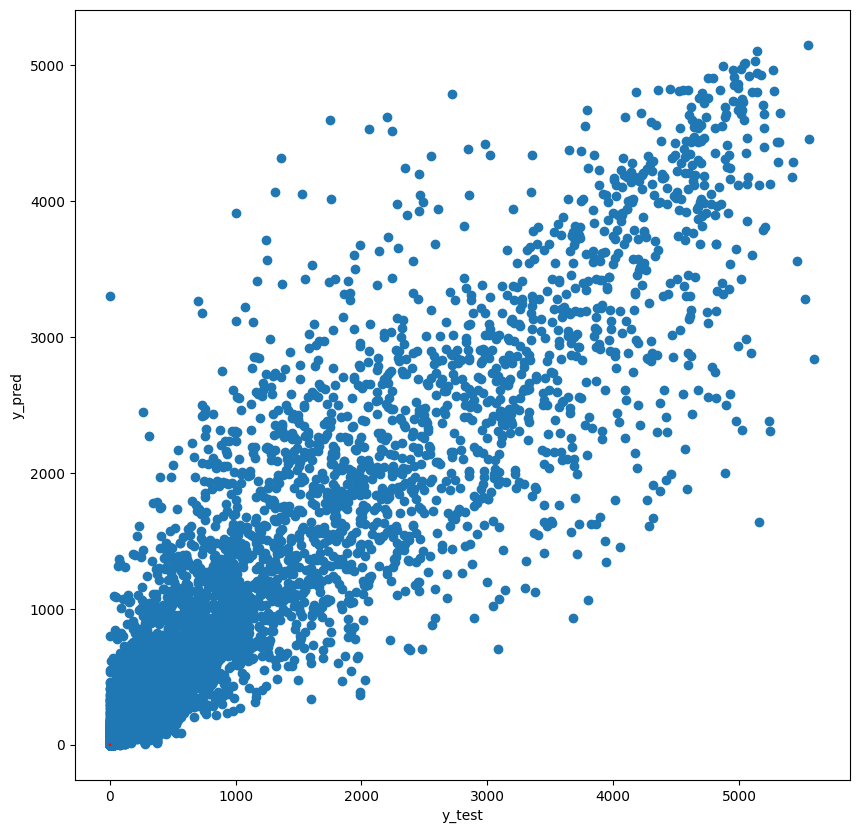

In [ ]:
analyse_model(y_pred, y_test)

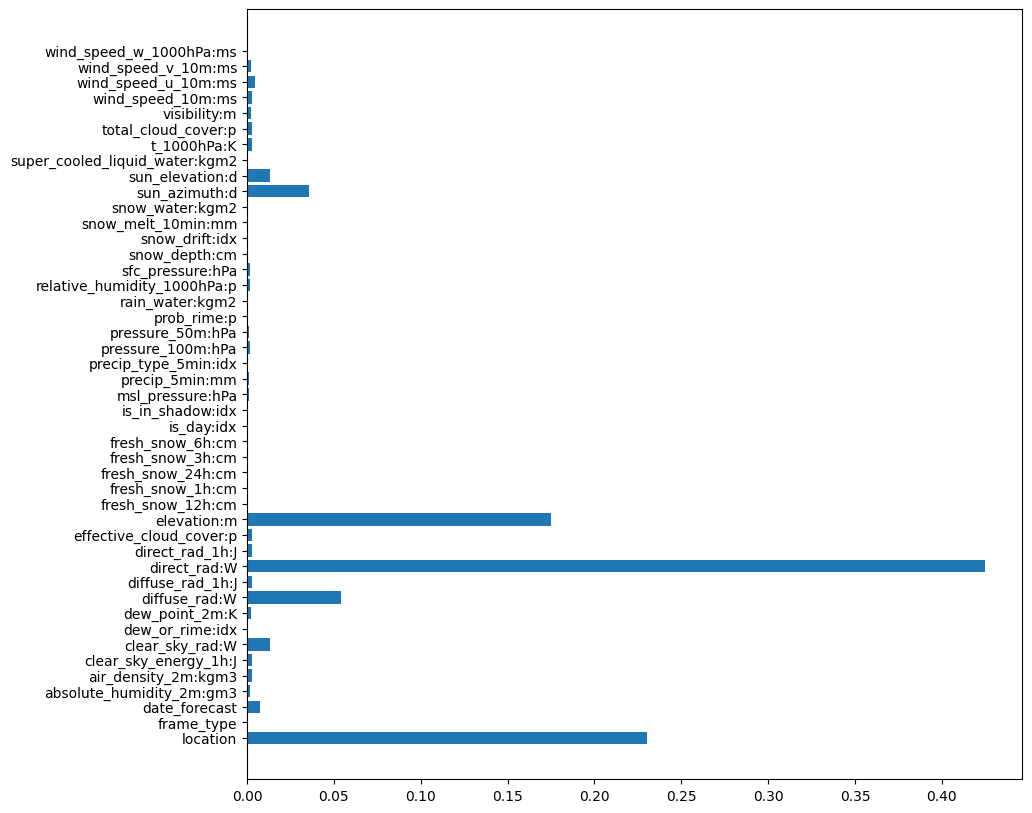

In [ ]:
plot_feature_importances(model, X_y_norm)

## Ajout d'un polynomial feature avant normalisation


In [181]:
from sklearn.preprocessing import PolynomialFeatures

In [182]:
def add_polynomial_feature(X, degree=2):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    # Obtenir les noms des colonnes d'origine
    orig_column_names = X.columns.tolist()

    # Générer les noms des nouvelles colonnes en concaténant les noms d'origine
    new_column_names = []
    for i in range(X_poly.shape[1]):
        feature_name = ''
        for j in range(len(orig_column_names)):
            if X_poly[0][i] == 1:  # Ne pas ajouter 'X' pour les colonnes constantes
                feature_name += '1'
            else:
                feature_name += orig_column_names[j] + '^' + str(int(X_poly[0][i]))
            if j < len(orig_column_names) - 1:
                feature_name += '_'
        new_column_names.append(feature_name)

    X_poly = pd.DataFrame(X_poly, columns=new_column_names)

    return X_poly

In [183]:
X_deg_2 = add_polynomial_feature(X_copy_nan, degree=2)
X_deg_2 = sklearn_z_score_normalize_dataframe(X_deg_2)

## Test sur les localisations indépendantes :

In [ ]:
# Extraction d'une localisation

In [184]:
X_a = X_y[X_y["location"] == 1]

In [185]:
X_a.describe()

,location,frame_type,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,pv_measurement
count,34061.0,34061.000000,34061.000000,34061.000000,26284.000000,3.406100e+04,34061.000000,30998.000000,34061.000000,34061.000000,34061.000000,3.406100e+04,34061.000000,3.406100e+04,34061.000000,34061.0,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,1135.0,34061.000000,34061.0,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000,34061.000000
mean,1.0,1.870996,6.322345,1.253279,2887.867676,5.526699e+05,153.522385,1684.819458,0.021109,275.971649,42.171734,1.518185e+05,52.581528,1.892938e+05,67.631783,6.0,0.087728,0.007396,0.173345,0.022216,0.044191,0.499369,0.537271,1009.603455,0.006127,0.088283,996.707581,1002.828796,0.234973,0.010904,74.024307,1008.977661,250.0,0.073456,0.0,0.000126,0.089742,182.446899,-0.047865,0.055703,279.936707,74.234741,32579.109375,3.061046,0.655333,0.567538,0.000021,631.011165
std,0.0,0.335209,2.801960,0.037245,2551.164062,8.503473e+05,236.807220,1788.165161,0.195653,6.896890,62.958401,2.241320e+05,115.252647,4.097873e+05,34.585548,0.0,0.595170,0.090303,0.928429,0.219313,0.370582,0.500007,0.498616,12.742348,0.036830,0.379740,12.606475,12.662645,2.907591,0.046038,13.981446,12.721137,0.0,0.468310,0.0,0.002653,0.251362,103.303932,24.194777,0.109655,6.669673,34.467426,18114.937500,1.793841,2.896993,1.856094,0.001433,1166.206066
min,1.0,1.000000,0.700000,1.145000,27.799999,0.000000e+00,0.000000,27.799999,-1.000000,250.899994,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,944.299988,0.000000,0.000000,932.299988,938.099976,0.000000,0.000000,21.500000,943.900024,250.0,0.000000,0.0,-0.000000,0.000000,0.012000,-49.941002,0.000000,258.899994,0.000000,154.300003,0.000000,-7.300000,-9.300000,-0.000000,0.000000
25%,1.0,2.000000,4.200000,1.228000,1075.174927,0.000000e+00,0.000000,561.724976,0.000000,271.299988,0.000000,0.000000e+00,0.000000,0.000000e+00,42.900002,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1001.700012,0.000000,0.000000,988.900024,995.000000,0.000000,0.000000,64.699997,1001.099976,250.0,0.000000,0.0,0.000000,0.000000,91.866997,-17.025000,0.000000,275.200012,53.099998,15583.599609,1.700000,-1.500000,-0.700000,0.000000,0.000000
50%,1.0,2.000000,5.800000,1.251000,1889.850098,1.537820e+04,0.000000,1107.900024,0.000000,276.000000,0.000000,1.596740e+04,0.000000,0.000000e+00,81.300003,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1010.599976,0.000000,0.000000,997.700012,1003.799988,0.000000,0.000000,76.400002,1009.900024,250.0,0.000000,0.0,0.000000,0.000000,179.526001,-0.051000,0.000000,279.500000,95.199997,36456.199219,2.700000,0.300000,0.600000,0.000000,6.160000
75%,1.0,2.000000,8.300000,1.277000,3985.074951,9.042897e+05,249.699997,2021.400024,0.000000,281.299988,71.199997,2.561786e+05,33.900002,1.292543e+05,99.400002,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1018.400024,0.000000,0.000000,1005.

In [186]:
test_size = int(0.2 * len(X_a))
X_train_a = X_a.iloc[:-test_size]
X_test_a = X_a.iloc[-test_size:]

In [187]:
# Preprocessing :
def preprocessing(df,return_scaler=False,scaler=None):
  # gestion des Nan
  df = df.dropna(axis=1, how='any')
  # colonne frame_type
  df = df.drop("frame_type",axis=1)
  # gestion index
  df.reset_index(drop=True, inplace=True)
  # gestion type de la date
  df[('date_forecast')] = df[('date_forecast')].values.astype("float64")
  # separation en X et y
  y = df['pv_measurement']
  X = df.drop(['pv_measurement'],axis=1)
  # normalisation de X
  if return_scaler :
    X,scaler = sklearn_z_score_normalize_dataframe(X,return_scaler,scaler=scaler) # moyenne std
    return X,y,scaler
  else :
    X= sklearn_z_score_normalize_dataframe(X,return_scaler,scaler=scaler) # moyenne std
  #X = normalize_dataframe(X) # min max
  return X,y


In [188]:
X_train_a_preprocessed_base = X_train_a.copy()
X_test_a_preprocessed_base = X_test_a.copy()

X_train_a_preprocessed , y_train_a, scaler= preprocessing(X_train_a_preprocessed_base,True)
X_test_a_preprocessed , y_test_a = preprocessing(X_test_a_preprocessed_base,scaler=scaler)

In [189]:
X_train_a_preprocessed.describe()

,location,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,clear_sky_energy_1h:J,clear_sky_rad:W,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
count,27249.0,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,27249.0,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,27249.0,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04,2.724900e+04
mean,0.0,1.118135e-14,5.006577e-17,2.503288e-15,7.509865e-17,-1.668859e-17,-2.086074e-17,4.672805e-16,8.344294e-18,-1.668859e-17,-5.841006e-17,-2.503288e-17,-7.092650e-17,0.0,1.043037e-17,-2.816199e-17,2.711896e-17,-2.920503e-17,1.877466e-17,-1.001315e-16,-1.835745e-16,2.716068e-15,1.668859e-17,3.337718e-17,-3.020635e-15,-3.467054e-15,6.258221e-18,1.877466e-17,-1.293366e-16,-1.869122e-15,4.589362e-17,0.0,1.460252e-17,2.086074e-17,1.016961e-16,8.344294e-18,-2.711896e-17,-1.347604e-15,1.960909e-16,-6.779739e-17,5.632399e-17,-3.754932e-17,3.337718e-17,8.344294e-18
std,0.0,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,0.0,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,0.0,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,0.0,-1.518789e+00,-1.952779e+00,-2.856817e+00,-6.198944e-01,-6.183738e-01,-5.122020e+00,-3.514643e+00,-6.429346e-01,-6.499757e-01,-4.411985e-01,-4.463924e-01,-1.915316e+00,0.0,-1.465711e-01,-8.061162e-02,-1.866288e-01,-9.898309e-02,-1.170909e-01,-9.583336e-01,-1.126353e+00,-5.072093e+00,-1.568366e-01,-1.724028e-01,-5.057721e+00,-5.060214e+00,-8.429860e-02,-2.307911e-01,-3.822677e+00,-5.063786e+00,-1.759124e-01,0.0,-5.322565e-02,-3.562722e-01,-1.773845e+00,-1.991348e+00,-5.118763e-01,-3.019377e+00,-2.105489e+00,-1.790214e+00,-1.732848e+00,-2.706393e+00,-5.401726e+00,-1.211676e-02
25%,0.0,-8.176002e-01,-7.367656e-01,-7.030390e-01,-6.198944e-01,-6.183738e-01,-1.042266e-01,-6.617451e-01,-6.429346e-01,-6.499757e-01,-4.411985e-01,-4.463924e-01,-7.549753e-01,0.0,-1.465711e-01,-8.061162e-02,-1.866288e-01,-9.898309e-02,-1.170909e-01,-9.583336e-01,-1.126353e+00,-6.160300e-01,-1.568366e-01,-1.724028e-01,-6.146655e-01,-6.140970e-01,-8.429860e-02,-2.307911e-01,-6.692252e-01,-6.155496e-01,-1.759124e-01,0.0,-5.322565e-02,-3.562722e-01,-8.691979e-01,-7.179310e-01,-5.118763e-01,-6.965011e-01,-6.540215e-01,-9.380049e-01,-7.675345e-01,-7.360115e-01,-6.668707e-01,-1.211676e-02
50%,0.0,-1.164110e-01,-2.002893e-01,-2.836453e-02,-6.165189e-01,-6.183738e-01,-1.042266e-01,-1.984312e-02,-6.429346e-01,-6.121669e-01,-4.411985e-01,-4.463924e-01,3.650557e-01,0.0,-1.465711e-01,-8.061162e-02,-1.866288e-01,-9.898309e-02,-1.170909e-01,-9.583336e-01,8.878214e-01,5.629108e-02,-1.568366e-01,-1.724028e-01,5.732677e-02,5.478788e-02,-8.429860e-02,-2.307911e-01,1.71695

In [140]:
model, y_pred, y_test = build_model(X_train_a_preprocessed,y_train_a,X_test_a_preprocessed,y_test_a,n_estimators=150, max_depth=15)

RMSE: 499.8443493195849


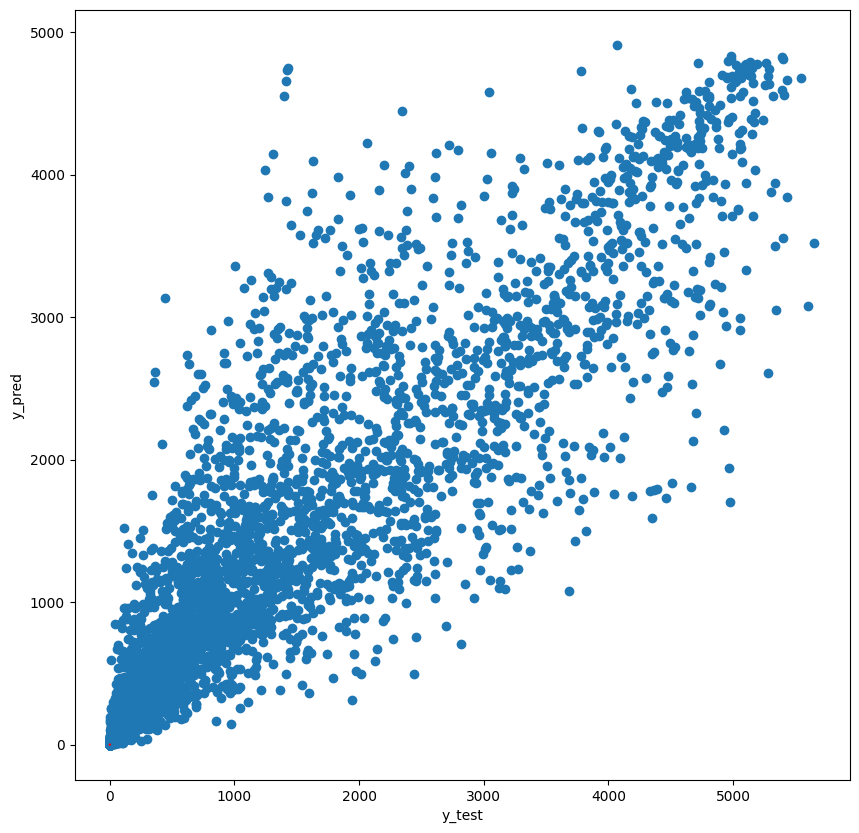

In [141]:
analyse_model(y_pred, y_test)

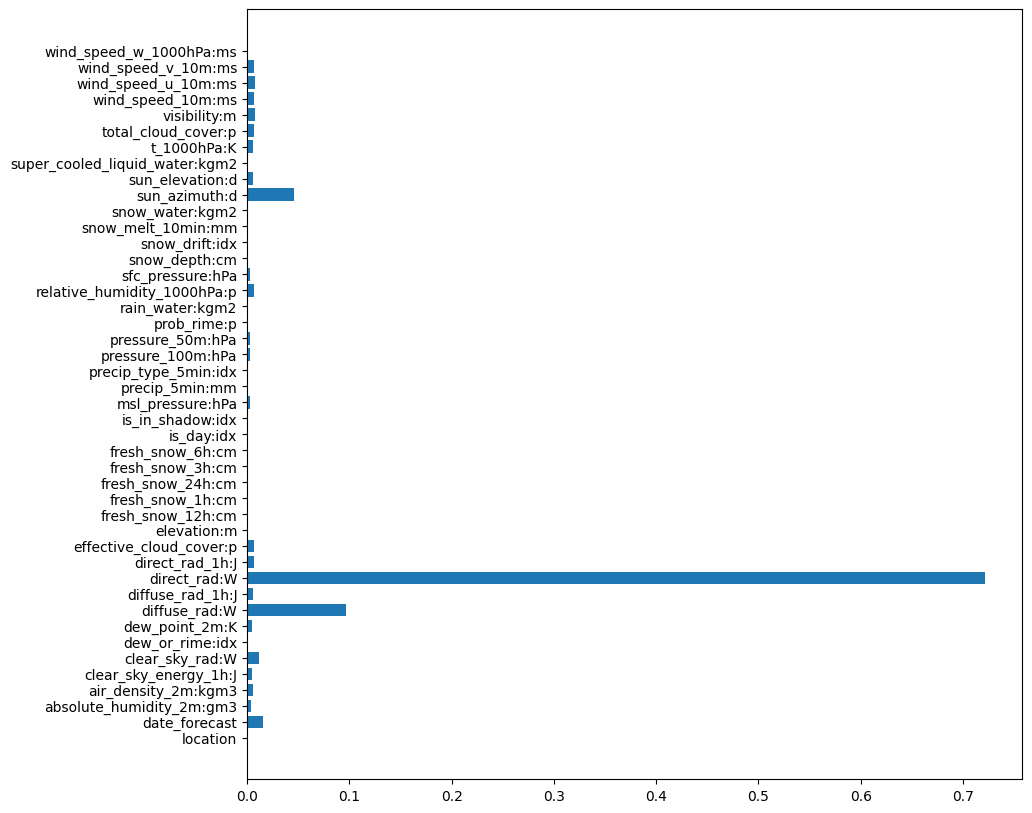

In [142]:
plot_feature_importances(model, X_train_a_preprocessed)

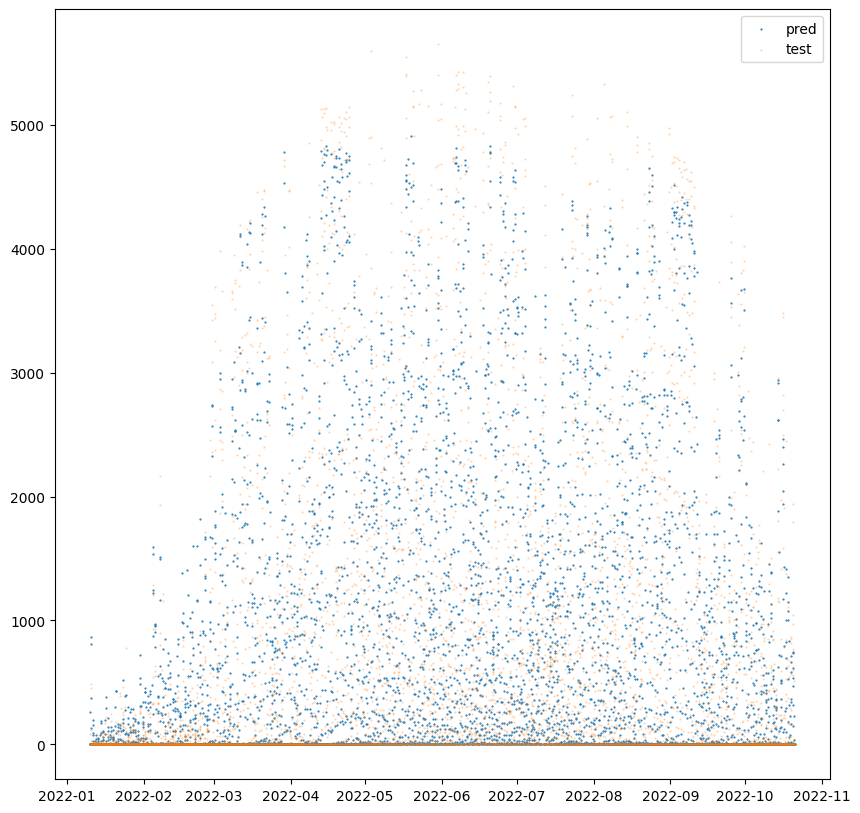

In [216]:
plt.figure(figsize=(10, 10))
plt.scatter(X_test_a["date_forecast"],y_pred,s=0.3,label="pred")
plt.scatter(X_test_a["date_forecast"],y_test,alpha=0.3,s=0.3,label="test")
plt.legend()

In [217]:
(y_test == 0).sum()

2666

In [218]:
y_test.shape

(6812,)

In [219]:
y_train_a.shape

(27249,)

In [220]:
(y_train_a == 0).sum()

13357

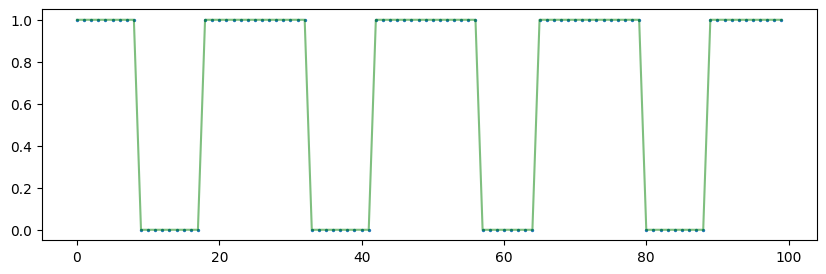

In [239]:
plt.figure(figsize=(10, 3))
test_0 = (y_train_a == 0)
plt.scatter(X_train_a_preprocessed.index[:100],test_0[:100],s=2)
plt.plot(X_train_a_preprocessed.index[:100],test_0[:100],c="green",alpha=0.5)

In [ ]:
plt.figure(figsize=(10, 3))
test_0 = (y_train_a == 0)
plt.scatter(X_train_a_preprocessed.index[:100],test_0[:100],s=2)
plt.plot(X_train_a_preprocessed.index[:100],test_0[:100],c="green",alpha=0.5)

In [229]:
y_train_a[y_train_a != 0]

9         34.76
10       248.60
11       442.42
12       565.84
13       679.80
          ...  
27229     68.86
27230    434.72
27231    397.76
27232    190.08
27233     25.96
Name: pv_measurement, Length: 13892, dtype: float64

## Remarques :

**Attention** : pour le rendu, on demande à des dates dans le futur. Il faut donc que le modèle prenne en compte les aspects chronologiques. Un simple random Forest ne suffit pas forcément , il faut faire attention à la séparation train test !!!


**Autres** : pour que le modèle comprenne les relations temporels, faire potentiellement 3 modèle différents !

# Code pour traiter et générer le fichier à déposer sur Kagle

In [190]:
# Lecture du fichier test
test = pd.read_csv('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/test.csv')
test_copy = test.copy()
test.rename(columns={'time': 'date_forecast'}, inplace=True)

# Lecture du fichier à rendre
sample_submission = pd.read_csv('/content/drive/MyDrive/EcolesIngenieur/NTNU/MachineLearning/GroupWork/sample_submission.csv')

In [191]:
test.shape

(2160, 4)

In [192]:
test["date_forecast"] = pd.to_datetime(test["date_forecast"])

In [240]:
test

,id,date_forecast,prediction,location
0,0,2023-05-01 00:00:00,0.062134,A
1,1,2023-05-01 01:00:00,0.269278,A
2,2,2023-05-01 02:00:00,0.012932,A
3,3,2023-05-01 03:00:00,0.030092,A
4,4,2023-05-01 04:00:00,0.648650,A
...,...,...,...,...
2155,2155,2023-07-03 19:00:00,0.672197,C
2156,2156,2023-07-03 20:00:00,0.266481,C
2157,2157,2023-07-03 21:00:00,0.010818,C
2158,2158,2023-07-03 22:00:00,0.639272,C


In [193]:
test.dtypes

id                        int64
date_forecast    datetime64[ns]
prediction                int64
location                 object
dtype: object

In [194]:
X_test_estimated_a["date_forecast"]

0      2023-05-01 00:00:00
1      2023-05-01 00:15:00
2      2023-05-01 00:30:00
3      2023-05-01 00:45:00
4      2023-05-01 01:00:00
               ...        
2875   2023-07-03 22:45:00
2876   2023-07-03 23:00:00
2877   2023-07-03 23:15:00
2878   2023-07-03 23:30:00
2879   2023-07-03 23:45:00
Name: date_forecast, Length: 2880, dtype: datetime64[ns]

In [195]:
# Lecture des données météo associée :
merged_df_a = pd.merge(X_test_estimated_a, test, on='date_forecast', how='inner')
merged_df_a


,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,id,prediction,location
0,2023-04-30 07:00:04,2023-05-01 00:00:00,4.4,1.286,912.700012,0.000000,0.0,1041.199951,0.0,271.700012,0.0,0.000000,0.0,0.0,80.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.0,0.0,1000.700012,1007.000000,0.0,0.0,80.300003,1013.299988,NaN,0.0,0.0,0.0,0.0,10.520000,-11.185,0.0,273.799988,80.699997,30210.699219,4.0,2.2,3.4,-0.0,0,0,A
1,2023-04-30 07:00:04,2023-05-01 00:00:00,4.4,1.286,912.700012,0.000000,0.0,1041.199951,0.0,271.700012,0.0,0.000000,0.0,0.0,80.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.0,0.0,1000.700012,1007.000000,0.0,0.0,80.300003,1013.299988,NaN,0.0,0.0,0.0,0.0,10.520000,-11.185,0.0,273.799988,80.699997,30210.699219,4.0,2.2,3.4,-0.0,720,0,B
2,2023-04-30 07:00:04,2023-05-01 00:00:00,4.4,1.286,912.700012,0.000000,0.0,1041.199951,0.0,271.700012,0.0,0.000000,0.0,0.0,80.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.0,0.0,1000.700012,1007.000000,0.0,0.0,80.300003,1013.299988,NaN,0.0,0.0,0.0,0.0,10.520000,-11.185,0.0,273.799988,80.699997,30210.699219,4.0,2.2,3.4,-0.0,1440,0,C
3,2023-04-30 07:00:04,2023-05-01 01:00:00,4.3,1.287,NaN,0.000000,0.0,1095.400024,0.0,271.600006,0.0,0.000000,0.0,0.0,64.500000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.299988,0.0,0.0,1000.200012,1006.500000,0.0,0.0,80.199997,1012.799988,NaN,0.0,0.0,0.0,0.0,25.135000,-9.128,0.0,273.799988,64.500000,29507.500000,3.9,2.0,3.3,-0.0,1,0,A
4,2023-04-30 07:00:04,2023-05-01 01:00:00,4.3,1.287,NaN,0.000000,0.0,1095.400024,0.0,271.600006,0.0,0.000000,0.0,0.0,64.500000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.299988,0.0,0.0,1000.200012,1006.500000,0.0,0.0,80.199997,1012.799988,NaN,0.0,0.0,0.0,0.0,25.135000,-9.128,0.0,273.799988,64.500000,29507.500000,3.9,2.0,3.3,-0.0,721,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2023-07-02 07:00:31,2023-07-03 22:00:00,9.0,1.207,2315.000000,1440.199951,0.0,1905.699951,0.0,282.600006,0.0,9402.900391,0.0,0.0,97.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.099976,0.0,0.0,980.599976,986.500000,0.0,0.0,81.300003,992.400024,NaN,0.0,0.0,-0.0,0.0,341.528015,-2.121,0.0,285.700012,97.199997,41096.601562,2.4,1.9,-1.4,0.0,1438,0,B
2156,2023-07-02 07:00:31,2023-07-03 22:00:00,9.0,1.207,2315.000000,1440.199951,0.0,1905.699951,0.0,282.600006,0.0,9402.900391,0.0,0.0,97.099998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.099976,0.0,0.0,980.599976,986.500000,0.0,0.0,81.300003,992.400024,NaN,0.0,0.0,-0.0,0.0,341.528015,-2.121,0.0,285.700012,97.199997,41096.601562,2.4,1.9,-1.4,0.0,2158,0,C
2157,2023-07-02 07:00:31,2023-07-03 23:00:00,9.1,1.207,2015.800049,0.000000,0.0,1537.300049,0.0,282.700012,0.0,0.000000,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,980.900024,986.799988,0.0,0.0,82.500000,992.700012,NaN,0.0,0.0,-0.0,0.0,355.317993,-3.469,0.1,285.299988,100.000000,39574.300781,2.0,1.6,-1.3,0.0,719,0,A
2158,2023-07-02 07:00:31,2023-07-03 23:00:00,9.1,1.207,2015.800049,0.000000,0.0,1537.300049,0.0,282.700012,0.0,0.000000,0.0,0.0,100.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,993.400024,0.0,0.0,980.900024,986.799988,0.0,0.0,82.500

In [196]:
# Preprocessing :
def preprocessing_test(df,scaler):
  # gestion des Nan
  df = df.dropna(axis=1, how='any')
  # gestion index
  df.reset_index(drop=True, inplace=True)
  #suppresion colonne date_calc
  df = df.drop(["date_calc","id","prediction"],axis=1)
  # Transformation de la colonne location
  df['location'] = df['location'].replace({'A': 1, 'B': 2, 'C': 3})
  #placer la colonne location en premier
  nouvel_ordre_colonnes = ['location'] + [col for col in df.columns if col != 'location']
  df = df[nouvel_ordre_colonnes]
  # gestion type de la date
  df[('date_forecast')] = df[('date_forecast')].values.astype("float64")
  # normalisation de X
  df = sklearn_z_score_normalize_dataframe(df,scaler=scaler) # moyenne std
  #X = normalize_dataframe(X) # min max
  return df

In [197]:
merged_df_a_preprocessed = preprocessing_test(merged_df_a,scaler=scaler)

In [198]:
result = model.predict(merged_df_a_preprocessed)

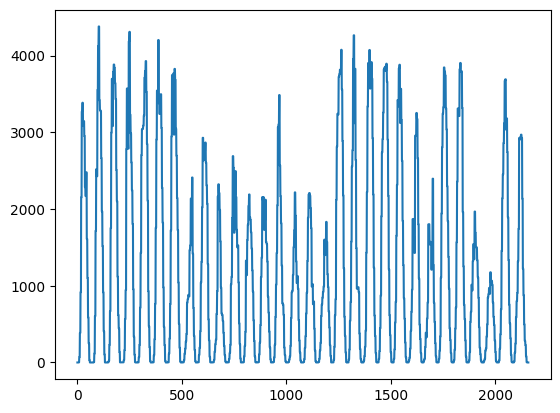

In [204]:
plt.plot(result)

In [199]:
# Example, let the predictions be random values
test['prediction'] = np.random.rand(len(test))
sample_submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)